
🎯 Final Evaluation: Agent reached the goal in 100.0% of episodes.


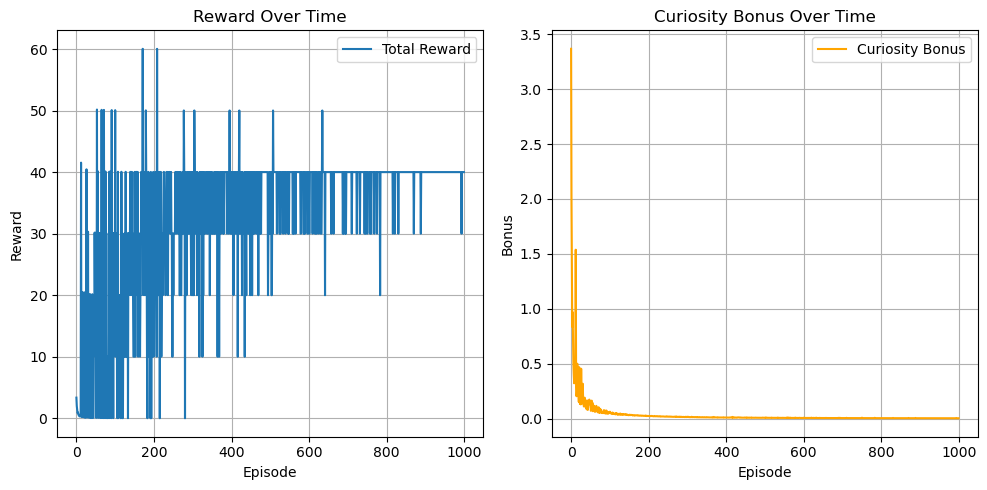

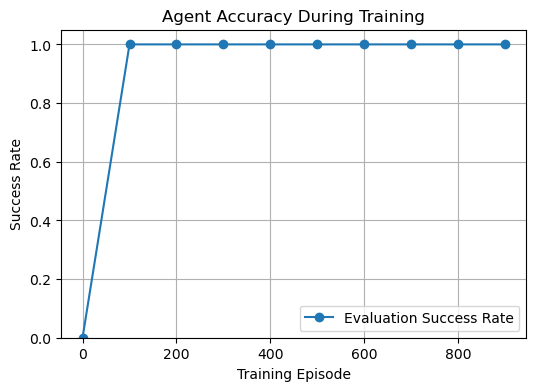

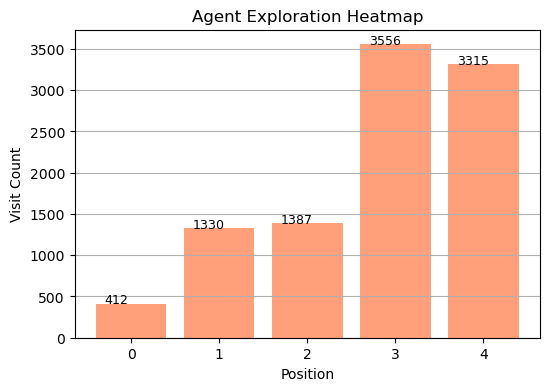

In [1]:
# agent_with_curiosity.py

import random
import matplotlib.pyplot as plt

# -----------------------------
# ENVIRONMENT & HYPERPARAMETERS
# -----------------------------
positions = [0, 1, 2, 3, 4]
goal_position = 4
alpha = 0.1         # Learning rate
gamma = 0.9         # Discount factor
epsilon = 1.0       # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01

# Q-table: position → {action: value}, actions = -1 (left), 1 (right)
q_table = {pos: {-1: 0.0, 1: 0.0} for pos in positions}
visit_count = {pos: 0 for pos in positions}

# Tracking
episode_rewards = []
bonus_per_episode = []
success_rates = []
eval_episodes = []

# -----------------------------
# TRAINING LOOP
# -----------------------------
episodes = 1000

for episode in range(episodes):
    position = 0
    total_reward = 0
    total_bonus = 0

    for step in range(10):
        # ε-greedy action selection
        if random.random() < epsilon:
            action = random.choice([-1, 1])
        else:
            action = max(q_table[position], key=q_table[position].get)

        new_position = max(0, min(position + action, 4))
        position = new_position
        visit_count[position] += 1

        # Reward + curiosity bonus
        reward = 10 if position == goal_position else 0
        bonus = 1 / (1 + visit_count[position])
        reward += bonus
        total_bonus += bonus

        # Q-learning update
        old_position = position - action
        old_value = q_table[old_position][action]
        max_future = max(q_table[position].values())
        new_value = old_value + alpha * (reward + gamma * max_future - old_value)
        q_table[old_position][action] = new_value

        total_reward += reward

    episode_rewards.append(total_reward)
    bonus_per_episode.append(total_bonus)

    # ε decay
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Periodic evaluation
    if episode % 100 == 0:
        eval_success = 0
        for _ in range(20):
            eval_pos = 0
            for _ in range(10):
                eval_action = max(q_table[eval_pos], key=q_table[eval_pos].get)
                eval_pos = max(0, min(eval_pos + eval_action, 4))
                if eval_pos == goal_position:
                    eval_success += 1
                    break
        success_rate = eval_success / 20
        success_rates.append(success_rate)
        eval_episodes.append(episode)

# -----------------------------
# FINAL EVALUATION
# -----------------------------
evaluation_episodes = 100
success_count = 0

for ep in range(evaluation_episodes):
    position = 0
    for step in range(10):
        action = max(q_table[position], key=q_table[position].get)
        new_position = max(0, min(position + action, 4))
        position = new_position
        if position == goal_position:
            success_count += 1
            break

success_rate = success_count / evaluation_episodes * 100
print(f"\n🎯 Final Evaluation: Agent reached the goal in {success_rate:.1f}% of episodes.")

# -----------------------------
# PLOTS
# -----------------------------

# 1. Reward vs Curiosity Bonus
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(episode_rewards, label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bonus_per_episode, label="Curiosity Bonus", color="orange")
plt.xlabel("Episode")
plt.ylabel("Bonus")
plt.title("Curiosity Bonus Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("reward_vs_bonus.png", dpi=300)
plt.show()

# 2. Evaluation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(eval_episodes, success_rates, marker='o', label="Evaluation Success Rate")
plt.xlabel("Training Episode")
plt.ylabel("Success Rate")
plt.title("Agent Accuracy During Training")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.savefig("agent_accuracy_during_training.png", dpi=300)
plt.show()

# 3. Exploration Heatmap
positions = list(visit_count.keys())
visits = list(visit_count.values())

plt.figure(figsize=(6, 4))
bars = plt.bar(positions, visits, color="lightsalmon")
plt.xlabel("Position")
plt.ylabel("Visit Count")
plt.title("Agent Exploration Heatmap")
plt.xticks(positions)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + 1, int(yval), fontsize=9)

plt.savefig("exploration_heatmap.png", dpi=300)
plt.show()